In [59]:
import numpy as np
import pandas as pd

In [60]:
#loading and reading the data files
df= pd.read_csv('/content/SeoulBikeData.csv')
df

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [61]:
#pull first 10 rows for structure observation
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [62]:
#observe the statistical characteristics of the dataframe
df.describe()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [63]:
# identifying missed values
missing_values=df.isna().sum()
print(missing_values)

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64


#no columns in the dataset has a considerable number of missed values


In [64]:
'''#exploiting the data for outliers
df2.plot(kind ='box', figsize=(16,9), vert=True)
plt.xticks(rotation=60)'''

"#exploiting the data for outliers\ndf2.plot(kind ='box', figsize=(16,9), vert=True)\nplt.xticks(rotation=60)"

it can be observed that the columns rented bike counts, wind speed,solar rotation, rainfall and snow fall all have outliers


In [65]:
#identifying the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [66]:
#pull out columns with exploitable data
df_num=df.select_dtypes(include=['float','int'])
df_num.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [67]:
#pull out the first five rows of the exploitable data
df_num.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


In [68]:
#establish a correlation table between the different variables
corr=df_num.corr()
corr_RBC=corr['Rented Bike Count'][1:]


In [69]:
#provide the absolute values of the correlation table.
X=(corr_RBC[abs(corr_RBC)>0.01].sort_values(ascending=False))
X


Temperature(C)              0.538558
Hour                        0.410257
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Visibility (10m)            0.199280
Wind speed (m/s)            0.121108
Rainfall(mm)               -0.123074
Snowfall (cm)              -0.141804
Humidity(%)                -0.199780
Name: Rented Bike Count, dtype: float64

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

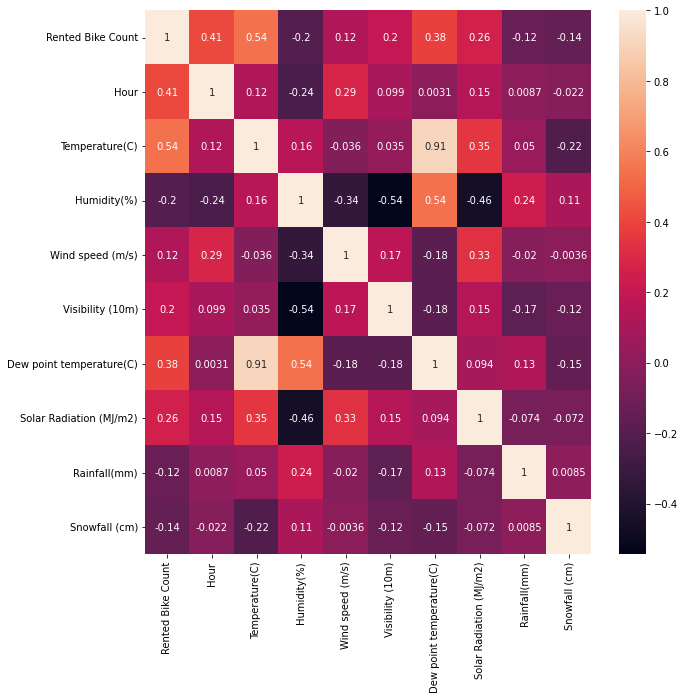

In [71]:
#plot a correlation graph between variables
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

The above graph demonstartes a very week positive and negative correlation between different variables

In [72]:
from datetime import datetime
df['Date'] = pd.to_datetime(df['Date'])
df['month']= pd.DatetimeIndex(df['Date']).month
df['day']= pd.DatetimeIndex(df['Date']).day
df['year']= pd.DatetimeIndex(df['Date']).year

In [73]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day,year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


In [74]:
df.drop('Date',inplace=True,axis=1)

In [75]:
df_cat=df.select_dtypes(include='object')

In [76]:
df_cat.head()

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [77]:
df_cat_2=df
for cols in df_cat:
  dummies =pd.get_dummies(df[cols],drop_first=True)
  df_cat_2 = pd.concat([df_cat_2,dummies],axis='columns')

In [78]:
'''from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
'''

'from sklearn.preprocessing import LabelEncoder\nencode = LabelEncoder()\n'

In [79]:
'''#label encoding columns with dtype = object
df['Seasons'] = encode.fit_transform(df['Seasons'])
df['Holiday']= encode.fit_transform(df['Holiday'])
df['Functioning Day']= encode.fit_transform(df['Functioning Day'])'''

"#label encoding columns with dtype = object\ndf['Seasons'] = encode.fit_transform(df['Seasons'])\ndf['Holiday']= encode.fit_transform(df['Holiday'])\ndf['Functioning Day']= encode.fit_transform(df['Functioning Day'])"

In [80]:
df_cat_2.drop({'Seasons','Holiday','Functioning Day'},axis=1,inplace=True)

In [81]:
#verifying data information after label encoding columns with dtype= object
df_cat_2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         8760 non-null   int64  
 1   Hour                      8760 non-null   int64  
 2   Temperature(C)            8760 non-null   float64
 3   Humidity(%)               8760 non-null   int64  
 4   Wind speed (m/s)          8760 non-null   float64
 5   Visibility (10m)          8760 non-null   int64  
 6   Dew point temperature(C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)   8760 non-null   float64
 8   Rainfall(mm)              8760 non-null   float64
 9   Snowfall (cm)             8760 non-null   float64
 10  month                     8760 non-null   int64  
 11  day                       8760 non-null   int64  
 12  year                      8760 non-null   int64  
 13  Spring                    8760 non-null   uint8  
 14  Summer  

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text major ticklabel objects>)

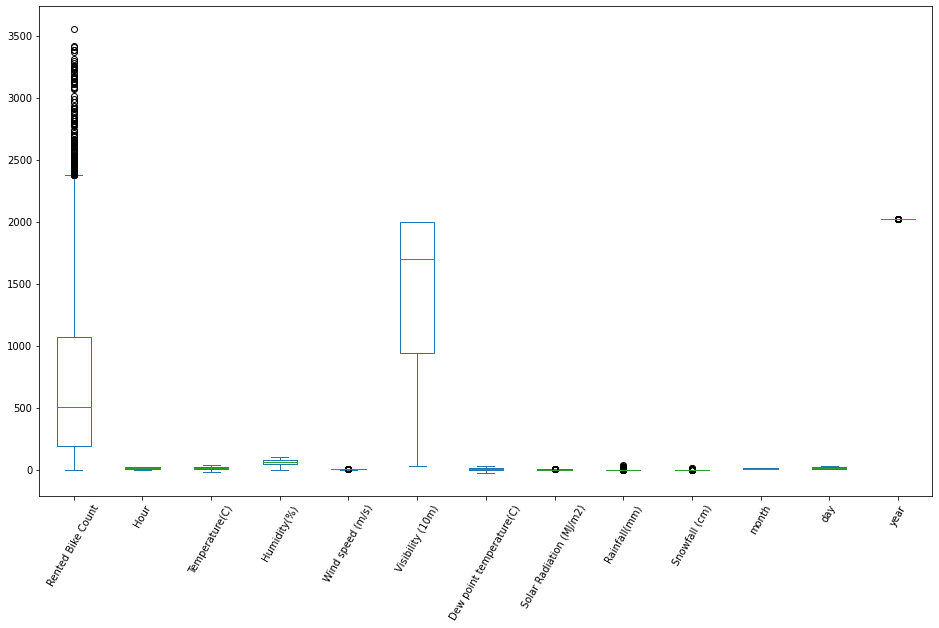

In [82]:
import matplotlib.pyplot as plt
#exploiting the data for outliers
df.plot(kind ='box', figsize=(16,9), vert=True)
plt.xticks(rotation=60)


In [86]:
#adjusting the data as per 'rented bike count' outliers
Q1 = np.percentile(df_cat_2['Rented Bike Count'],25,interpolation='midpoint')
Q2 = np.percentile(df_cat_2['Rented Bike Count'], 50, interpolation='midpoint')
Q3= np.percentile(df_cat_2['Rented Bike Count'], 75, interpolation='midpoint')
IQR = Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR


In [87]:
print(lower_limit)
print(upper_limit)

-1120.75
2377.25


In [88]:
#new dataframe with adjusted ouliers from 'rented bike count'
df2 = df_cat_2[df_cat_2['Rented Bike Count'] < upper_limit]
df2 = df2[df2['Rented Bike Count'] > lower_limit]
df2.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day,year,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]), <a list of 18 Text major ticklabel objects>)

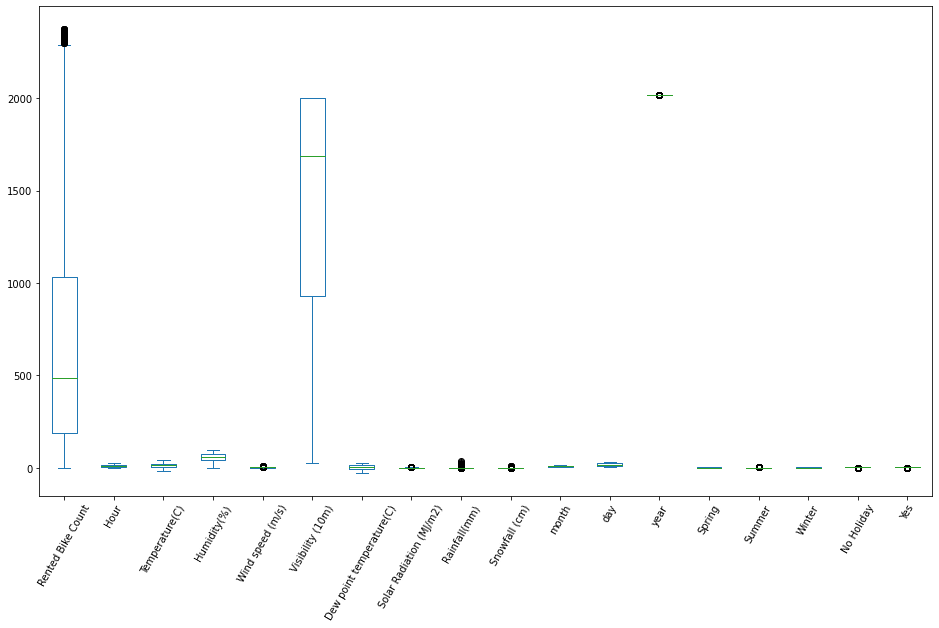

In [89]:
import matplotlib.pyplot as plt
#exploiting the data for outliers
df2.plot(kind ='box', figsize=(16,9), vert=True)
plt.xticks(rotation=60)

In [90]:
#adjusting the data as per 'wind speed' outliers
Q1 = np.percentile(df2['Wind speed (m/s)'],25,interpolation='midpoint')
Q2 = np.percentile(df2['Wind speed (m/s)'], 50, interpolation='midpoint')
Q3= np.percentile(df2['Wind speed (m/s)'], 75, interpolation='midpoint')
IQR = Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [91]:
print(lower_limit)
print(upper_limit)

-1.1999999999999997
4.3999999999999995


In [93]:
df2= df2[df2['Wind speed (m/s)']>lower_limit]
df2=df2[df2['Wind speed (m/s)']< upper_limit]
df2.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day,year,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1


In [94]:
#adjusting the data as per 'Solar Radiation (MJ/m2)' outliers
Q1 = np.percentile(df2['Solar Radiation (MJ/m2)'],25,interpolation='midpoint')
Q2 = np.percentile(df2['Solar Radiation (MJ/m2)'], 50, interpolation='midpoint')
Q3= np.percentile(df2['Solar Radiation (MJ/m2)'], 75, interpolation='midpoint')
IQR = Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [95]:
print(lower_limit)
print(upper_limit)

-1.35
2.25


In [96]:
df2=df2[df2['Solar Radiation (MJ/m2)']>lower_limit]
df2=df2[df2['Solar Radiation (MJ/m2)']<upper_limit]
df2.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day,year,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,12,2017,0,0,1,1,1


In [ ]:
#the outliers from the 'rainfall' and snowfall are not significant enough enough to be considered for an adjustement

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7752 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Rented Bike Count         7752 non-null   int64  
 1   Hour                      7752 non-null   int64  
 2   Temperature(C)            7752 non-null   float64
 3   Humidity(%)               7752 non-null   int64  
 4   Wind speed (m/s)          7752 non-null   float64
 5   Visibility (10m)          7752 non-null   int64  
 6   Dew point temperature(C)  7752 non-null   float64
 7   Solar Radiation (MJ/m2)   7752 non-null   float64
 8   Rainfall(mm)              7752 non-null   float64
 9   Snowfall (cm)             7752 non-null   float64
 10  month                     7752 non-null   int64  
 11  day                       7752 non-null   int64  
 12  year                      7752 non-null   int64  
 13  Spring                    7752 non-null   uint8  
 14  Summer  

In [98]:
#drop the datecolumn because of the dtype
df2.drop('Rainfall(mm)',axis=1, inplace=True)
df2.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Snowfall (cm),month,day,year,Spring,Summer,Winter,No Holiday,Yes
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,1,12,2017,0,0,1,1,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,1,12,2017,0,0,1,1,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,1,12,2017,0,0,1,1,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,1,12,2017,0,0,1,1,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,1,12,2017,0,0,1,1,1


In [99]:
corr2=df2.corr()
corr2

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Snowfall (cm),month,day,year,Spring,Summer,Winter,No Holiday,Yes
Rented Bike Count,1.000000,0.400517,0.533168,-0.162957,0.106349,0.188051,0.381486,0.248899,-0.140926,0.085771,0.047612,0.210914,0.013486,0.300130,-0.420918,0.070541,0.203973
Hour,0.400517,1.000000,0.098512,-0.226957,0.279841,0.086136,-0.011491,0.144502,-0.013805,0.002286,0.003028,-0.010204,-0.006378,-0.020638,0.017936,-0.003142,-0.000464
Temperature(C),0.533168,0.098512,1.000000,0.258581,-0.081031,0.004416,0.926904,0.246831,-0.215724,0.057944,0.074719,0.375687,0.017020,0.668624,-0.739998,0.047178,-0.066517
Humidity(%),-0.162957,-0.226957,0.258581,1.000000,-0.300416,-0.545389,0.591577,-0.389027,0.098863,0.036927,0.005529,0.062814,0.065737,0.233623,-0.298334,0.053084,-0.015357
Wind speed (m/s),0.106349,0.279841,-0.081031,-0.300416,1.000000,0.162613,-0.190484,0.287703,0.007440,-0.086576,-0.034216,-0.015524,0.051501,-0.077196,0.140779,-0.017298,0.014541
Visibility (10m),0.188051,0.086136,0.004416,-0.545389,0.162613,1.000000,-0.192794,0.114031,-0.119595,0.076128,-0.098266,0.048298,-0.197239,0.059877,0.020073,-0.037813,-0.033136
Dew point temperature(C),0.381486,-0.011491,0.926904,0.591577,-0.190484,-0.192794,1.000000,0.040846,-0.149055,0.063649,0.062857,0.336112,0.032497,0.650653,-0.726160,0.057885,-0.061882
Solar Radiation (MJ/m2),0.248899,0.144502,0.246831,-0.389027,0.287703,0.114031,0.040846,1.000000,-0.050075,-0.000131,-0.006638,0.093911,0.004487,0.073795,-0.104562,0.010337,-0.020711
Snowfall (cm),-0.140926,-0.013805,-0.215724,0.098863,0.007440,-0.119595,-0.149055,-0.050075,1.000000,0.055324,0.109372,-0.205551,-0.101073,-0.099393,0.220325,0.014126,0.034161
month,0.085771,0.002286,0.057944,0.036927,-0.086576,0.076128,0.063649,-0.000131,0.055324,1.000000,0.026068,-0.305477,-0.260897,0.052539,-0.149969,0.000524,-0.044799


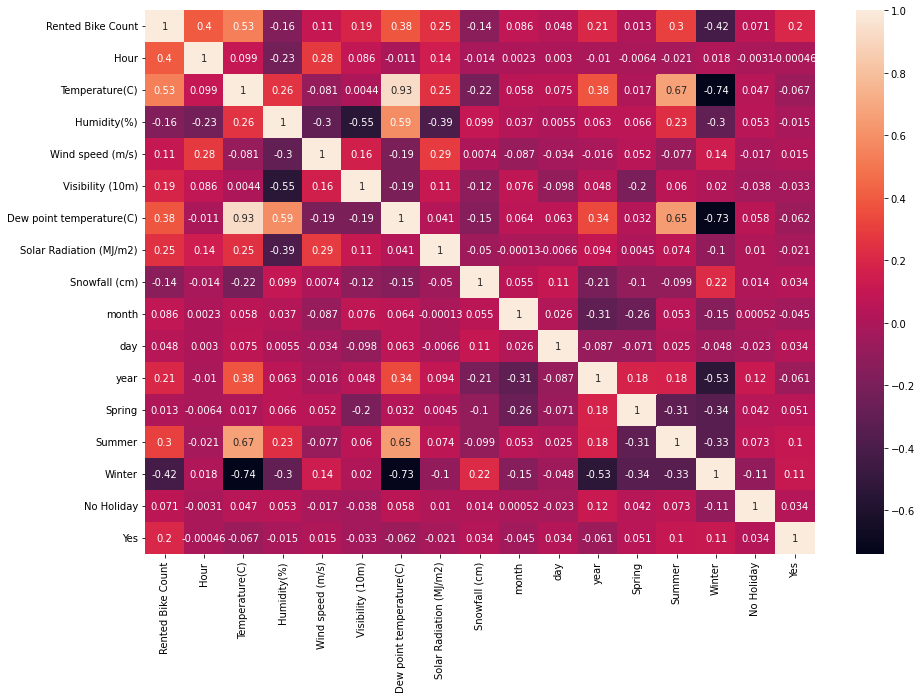

In [100]:
#plot a correlation graph between variables
plt.figure(figsize=(15,10))
sns.heatmap(corr2,annot=True)
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Changing the file read location to the location of the dataset
df4_binary = df[['Temperature(C)', 'Rented Bike Count']]

# Taking only the selected two attributes from the dataset
df4_binary.columns = ['Temp', 'Bike_count']



X =df2.drop('Rented Bike Count',axis=1)
y = df2['Rented Bike Count']

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

regr = LinearRegression()
  
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.5599857126370456


In [104]:
X_test.shape

(1551, 16)

In [103]:
y_test.shape

(1551,)

In [105]:
y_pred.shape

(1551,)

In [109]:
X_test.iloc[:,2]

289     52
1946    76
4693    67
7758    79
5473    78
        ..
2502    96
4318    85
7347    78
6540    74
3932    81
Name: Humidity(%), Length: 1551, dtype: int64